In [1]:
import pandas as pd
import numpy as np
import folium 
from bs4 import BeautifulSoup
import requests as rq
from geopy.geocoders import Nominatim
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Fetch Planning Areas of Singapore and location coordinates

In [2]:
# Get Planning areas of Singapore 
# DS: https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore
html = rq.get('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore').content
soup = BeautifulSoup(html)
tb = soup.find('table',{'class':'wikitable sortable'})


In [3]:
df = pd.DataFrame(columns=['Name','Region','Area(KM2)','Population','Density(/KM2)'])

In [4]:
tb.find('tbody').findAll('tr')
len(tb)

2

In [5]:
def convertHTMLTabletoDF(htmltab,df):
    rows = htmltab.find('tbody').findAll('tr')
    for i,row in enumerate(rows):
        if i==0:
            continue
        cols = row.findAll('td')
        vals=[]
        for j,col in enumerate(cols):
            if(j==1 or j==2 or j==3 or j==4):
                continue
            vals.append(col.text.rstrip('\n'))
        df.loc[i-1,:] = vals
    return df

In [6]:
df = convertHTMLTabletoDF(tb,df)

In [7]:
df

,Name,Region,Area(KM2),Population,Density(/KM2)
0,Ang Mo Kio,North-East,13.94,"163,950","13,400"
1,Bedok,East,21.69,"279,380","13,000"
2,Bishan,Central,7.62,"88,010","12,000"
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,"153,740","14,000"
5,Bukit Merah,Central,14.34,"151,980","11,000"
6,Bukit Panjang,West,8.99,"139,280","15,000"
7,Bukit Timah,Central,17.53,"77,430","4,400"
8,Central Water Catchment,North,37.15,*,*
9,Changi,East,40.61,"1,830",80.62


In [8]:
len(df)

55

In [10]:
for i,nm in enumerate(df['Name']):
    address = nm
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df.loc[i,'Latitude'] = latitude
    df.loc[i,'Longitude'] = longitude

In [11]:
df

,Name,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338575,103.705848
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591
5,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582
6,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136
7,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372
8,Central Water Catchment,North,37.15,*,*,1.375708,103.801743
9,Changi,East,40.61,"1,830",80.62,36.839435,119.401326


In [12]:
mp=folium.Map(location=[1.3521,103.8198],zoom_start=11)

In [13]:
for lat,lng,nm,dens in zip(df['Latitude'],df['Longitude'],df['Name'],df['Density(/KM2)']):
    folium.Marker(
        location = [lat,lng],
        popup=nm+' '+dens +'/Km2'
    ).add_to(mp)
mp

## Get data for monthly average income by planning area

In [14]:
inc_xl=pd.ExcelFile('.\\monthlyincomeplanningarea.xlsx')
mon_inc_df = inc_xl.parse('Sheet1')
mon_inc_df

,Planning Area,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999","$2,000 - $2,499","$2,500 - $2,999","$3,000 - $3,999","$4,000 - $4,999","$5,000 - $5,999","$6,000 - $6,999","$7,000 - $7,999","$8,000 - $8,999","$9,000 - $9,999","$10,000 - $10,999","$11,000 - $11,999","$12,000 & Over"
0,Ang Mo Kio,9700,12100,7900,7400,6800,11500,9800,7900,6000,4000,3100,2200,2600,1700,8600
1,Bedok,12200,13600,12100,9700,9600,17200,13400,12200,9200,5400,5100,4000,4500,2700,19400
2,Bishan,3900,3700,2200,2900,2400,4600,4700,3800,2700,2800,3100,1800,1800,1600,7600
3,Bukit Batok,6100,6500,5200,5800,4900,8600,7600,6700,4400,3500,2600,2400,2500,1500,7400
4,Bukit Merah,8500,9200,6900,6600,4400,8300,7000,5500,4700,4200,3000,2100,2200,1500,8000
5,Bukit Panjang,5100,6500,5200,6300,6500,10500,8300,7200,5500,3800,3400,2600,2000,1000,6100
6,Bukit Timah,2100,1400,1200,1200,700,2100,2000,2900,1300,1900,1600,1500,2200,1100,13700
7,Choa Chu Kang,7300,7800,6300,7500,6500,14500,10600,8000,5900,5400,5000,2600,2200,1300,6500
8,Clementi,3800,3600,2400,2300,2600,5000,4300,3600,3100,3200,1700,1800,1700,1000,6100
9,Geylang,6500,5900,4400,5300,3500,7800,5700,4400,3500,2400,2400,2000,1500,1000,4900


In [15]:
s1 = set(df['Name'])
s2 = set(mon_inc_df['Planning Area'])
ls=list(s1.intersection(s2))

In [16]:
df_filtered = df[df['Name'].isin(ls)]
df_filtered.reset_index()
df_filtered.rename(columns={"Name": "Planning Area"},inplace=True)
df_filtered

C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255
4,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591
5,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582
6,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136
7,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372
11,Choa Chu Kang,West,6.11,"190,890","30,000",1.384749,103.744534
12,Clementi,West,9.49,"92,420","9,800",1.315100,103.765231
14,Geylang,Central,9.64,"110,200","11,400",1.318186,103.887056


In [17]:
df_comb = df_filtered.merge(mon_inc_df,on=['Planning Area'],how='left')
df_comb

,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999",...,"$3,000 - $3,999","$4,000 - $4,999","$5,000 - $5,999","$6,000 - $6,999","$7,000 - $7,999","$8,000 - $8,999","$9,000 - $9,999","$10,000 - $10,999","$11,000 - $11,999","$12,000 & Over"
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,9700,12100,7900,...,11500,9800,7900,6000,4000,3100,2200,2600,1700,8600
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,12200,13600,12100,...,17200,13400,12200,9200,5400,5100,4000,4500,2700,19400
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,3900,3700,2200,...,4600,4700,3800,2700,2800,3100,1800,1800,1600,7600
3,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,6100,6500,5200,...,8600,7600,6700,4400,3500,2600,2400,2500,1500,7400
4,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582,8500,9200,6900,...,8300,7000,5500,4700,4200,3000,2100,2200,1500,8000
5,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,5100,6500,5200,...,10500,8300,7200,5500,3800,3400,2600,2000,1000,6100
6,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372,2100,1400,1200,...,2100,2000,2900,1300,1900,1600,1500,2200,1100,13700
7,Choa Chu Kang,West,6.11,"190,890","30,000",1.384749,103.744534,7300,7800,6300,...,14500,10600,8000,5900,5400,5000,2600,2200,1300,6500
8,Clementi,West,9.49,"92,420","9,800",1.315100,103.765231,3800,3600,2400,...,5000,4300,3600,3100,3200,1700,1800,1700,1000,6100
9,Geylang,Central,9.64,"110,200","11,400",1.318186,103.887056,6500,5900,4400,...,7800,5700,4400,3500,2400,2400,2000,1500,1000,4900


## Fetch Chinese Population for each planning area 

In [18]:
chinese_pop = pd.read_excel(pd.ExcelFile('.\\chinese_pop.xlsx'),sheet_name=0)
chinese_pop

,Planning Area,Chinese
0,Ang Mo Kio,143290.0
1,Bedok,208880.0
2,Bishan,77220.0
3,Boon Lay,NaN
4,Bukit Batok,102080.0
5,Bukit Merah,122610.0
6,Bukit Panjang,103280.0
7,Bukit Timah,64150.0
8,Central Water Catchment,NaN
9,Changi,1200.0


In [19]:
df_comb = df_comb.merge(chinese_pop,on=['Planning Area'],how='left')

In [20]:
df_comb

,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999",...,"$4,000 - $4,999","$5,000 - $5,999","$6,000 - $6,999","$7,000 - $7,999","$8,000 - $8,999","$9,000 - $9,999","$10,000 - $10,999","$11,000 - $11,999","$12,000 & Over",Chinese
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,9700,12100,7900,...,9800,7900,6000,4000,3100,2200,2600,1700,8600,143290.0
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,12200,13600,12100,...,13400,12200,9200,5400,5100,4000,4500,2700,19400,208880.0
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,3900,3700,2200,...,4700,3800,2700,2800,3100,1800,1800,1600,7600,77220.0
3,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,6100,6500,5200,...,7600,6700,4400,3500,2600,2400,2500,1500,7400,102080.0
4,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582,8500,9200,6900,...,7000,5500,4700,4200,3000,2100,2200,1500,8000,122610.0
5,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,5100,6500,5200,...,8300,7200,5500,3800,3400,2600,2000,1000,6100,103280.0
6,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372,2100,1400,1200,...,2000,2900,1300,1900,1600,1500,2200,1100,13700,64150.0
7,Choa Chu Kang,West,6.11,"190,890","30,000",1.384749,103.744534,7300,7800,6300,...,10600,8000,5900,5400,5000,2600,2200,1300,6500,123450.0
8,Clementi,West,9.49,"92,420","9,800",1.315100,103.765231,3800,3600,2400,...,4300,3600,3100,3200,1700,1800,1700,1000,6100,70700.0
9,Geylang,Central,9.64,"110,200","11,400",1.318186,103.887056,6500,5900,4400,...,5700,4400,3500,2400,2400,2000,1500,1000,4900,88060.0


## Use the foursquare API 

In [21]:
# Get No of indian restaurants near each planning area
# Get no of parks near each planning area

# Set the credentials
CLIENT_ID='BQBN0VJCQYWDGHJYQS4P0WTSM3QY0X0SDSKQ0BQJLA0TYWAR'
CLIENT_SECRET='LOQPZR5YABSVVI3M4O3PMCXFGONYZUNY3AD3NXQ51L410EVG'
VERSION=20200514
category_filter='Chinese Restaurant'
api_url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}'

In [22]:
def calTotalIndianRestNearPlanningAreas(df):
    for i,lt,ln,ar in zip(df.index,df['Latitude'],df['Longitude'],df['Area(KM2)']):
        rad = (math.sqrt(float(ar)/(3.14)))*1000
        loc=str(lt)+','+str(ln)
        res = rq.get(api_url.format(CLIENT_ID,CLIENT_SECRET,VERSION,loc,str(rad)))
        json_res = json.loads(res.text)
        venues=json_res['response']['groups'][0]['items']
        ch_res_cnt=0
        tot_res=0
        for venue in venues:
            cat = venue['venue']['categories'][0]
            nm = cat['name']
            if(nm==category_filter):
                ch_res_cnt=ch_res_cnt+1
            if(nm[-10:]=='Restaurant'):
                tot_res=tot_res+1
        df.loc[i,'Chinese Restaurant'] = ch_res_cnt
        df.loc[i,'Total Restaurants'] = tot_res
    return df
            

In [23]:
df_final = calTotalIndianRestNearPlanningAreas(df_comb)
df_final.head()

,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999",...,"$6,000 - $6,999","$7,000 - $7,999","$8,000 - $8,999","$9,000 - $9,999","$10,000 - $10,999","$11,000 - $11,999","$12,000 & Over",Chinese,Chinese Restaurant,Total Restaurants
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,9700,12100,7900,...,6000,4000,3100,2200,2600,1700,8600,143290.0,2.0,7.0
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,12200,13600,12100,...,9200,5400,5100,4000,4500,2700,19400,208880.0,4.0,15.0
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,3900,3700,2200,...,2700,2800,3100,1800,1800,1600,7600,77220.0,4.0,12.0
3,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,6100,6500,5200,...,4400,3500,2600,2400,2500,1500,7400,102080.0,4.0,10.0
4,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582,8500,9200,6900,...,4700,4200,3000,2100,2200,1500,8000,122610.0,1.0,1.0


In [24]:
df_final.rename(columns={'Chinese': 'Chinese Population'},inplace=True)

In [25]:
df_final

,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999",...,"$6,000 - $6,999","$7,000 - $7,999","$8,000 - $8,999","$9,000 - $9,999","$10,000 - $10,999","$11,000 - $11,999","$12,000 & Over",Chinese Population,Chinese Restaurant,Total Restaurants
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,9700,12100,7900,...,6000,4000,3100,2200,2600,1700,8600,143290.0,2.0,7.0
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,12200,13600,12100,...,9200,5400,5100,4000,4500,2700,19400,208880.0,4.0,15.0
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,3900,3700,2200,...,2700,2800,3100,1800,1800,1600,7600,77220.0,4.0,12.0
3,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,6100,6500,5200,...,4400,3500,2600,2400,2500,1500,7400,102080.0,4.0,10.0
4,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582,8500,9200,6900,...,4700,4200,3000,2100,2200,1500,8000,122610.0,1.0,1.0
5,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,5100,6500,5200,...,5500,3800,3400,2600,2000,1000,6100,103280.0,0.0,10.0
6,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372,2100,1400,1200,...,1300,1900,1600,1500,2200,1100,13700,64150.0,0.0,7.0
7,Choa Chu Kang,West,6.11,"190,890","30,000",1.384749,103.744534,7300,7800,6300,...,5900,5400,5000,2600,2200,1300,6500,123450.0,2.0,10.0
8,Clementi,West,9.49,"92,420","9,800",1.315100,103.765231,3800,3600,2400,...,3100,3200,1700,1800,1700,1000,6100,70700.0,3.0,9.0
9,Geylang,Central,9.64,"110,200","11,400",1.318186,103.887056,6500,5900,4400,...,3500,2400,2400,2000,1500,1000,4900,88060.0,3.0,13.0


In [26]:
df_final['Chinese Population']=df_final['Chinese Population'].astype(float)
df_final['Area(KM2)']=df_final['Area(KM2)'].astype(float)

In [27]:
df_final['Chinese pop density'] = df_final['Chinese Population'] / df_final['Area(KM2)']

In [28]:
df_final.columns

Index(['Planning Area', 'Region', 'Area(KM2)', 'Population', 'Density(/KM2)',
       'Latitude', 'Longitude', 'Below $1,000', '$1,000 - $1,499',
       '$1,500 - $1,999', '$2,000 - $2,499', '$2,500 - $2,999',
       '$3,000 - $3,999', '$4,000 - $4,999', '$5,000 - $5,999',
       '$6,000 - $6,999', '$7,000 - $7,999', '$8,000 - $8,999',
       '$9,000 - $9,999', '$10,000 - $10,999', '$11,000 - $11,999',
       '$12,000 & Over', 'Chinese Population', 'Chinese Restaurant',
       'Total Restaurants', 'Chinese pop density'],
      dtype='object')

In [29]:
df_final['<5K$'] = df_final['Below $1,000']+df_final['$1,000 - $1,499']+df_final['$1,500 - $1,999']+df_final['$2,000 - $2,499']+df_final['$2,500 - $2,999']+df_final['$3,000 - $3,999']+df_final['$4,000 - $4,999']
df_final['>=5K$&<10k$'] = df_final['$5,000 - $5,999']+df_final['$6,000 - $6,999']+df_final['$7,000 - $7,999']+df_final['$8,000 - $8,999']+df_final['$9,000 - $9,999']
df_final['>=10K$'] = df_final['$10,000 - $10,999']+df_final['$11,000 - $11,999']+df_final['$11,000 - $11,999']
df_final['Chinese Rest Ratio'] = df_final['Chinese Restaurant']/df_final['Total Restaurants']

In [30]:
df_final.head()


,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999",...,"$11,000 - $11,999","$12,000 & Over",Chinese Population,Chinese Restaurant,Total Restaurants,Chinese pop density,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,9700,12100,7900,...,1700,8600,143290.0,2.0,7.0,10279.053085,65200,23200,6000,0.285714
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,12200,13600,12100,...,2700,19400,208880.0,4.0,15.0,9630.244352,87800,35900,9900,0.266667
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,3900,3700,2200,...,1600,7600,77220.0,4.0,12.0,10133.858268,24400,14200,5000,0.333333
3,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,6100,6500,5200,...,1500,7400,102080.0,4.0,10.0,9171.608266,44700,19600,5500,0.400000
4,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582,8500,9200,6900,...,1500,8000,122610.0,1.0,1.0,8550.209205,50900,19500,5200,1.000000


# Visualize some relationships

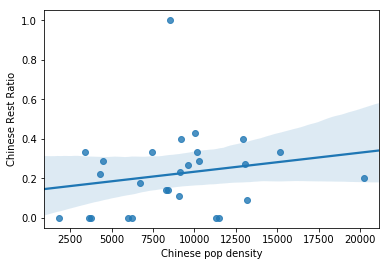

In [31]:
sns.regplot(df_final['Chinese pop density'],df_final['Chinese Rest Ratio'])

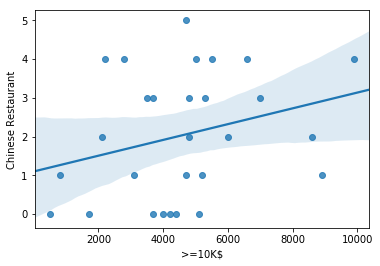

In [32]:
sns.regplot(df_final['>=10K$'],df_final['Chinese Restaurant'])

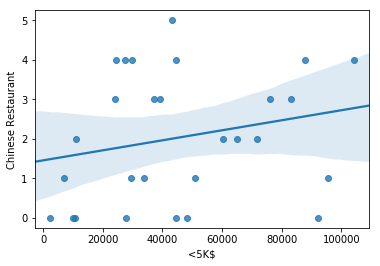

In [38]:
sns.regplot(df_final['<5K$'],df_final['Chinese Restaurant'])

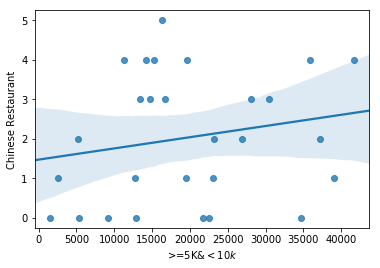

In [41]:
sns.regplot(df_final['>=5K$&<10k$'],df_final['Chinese Restaurant'])

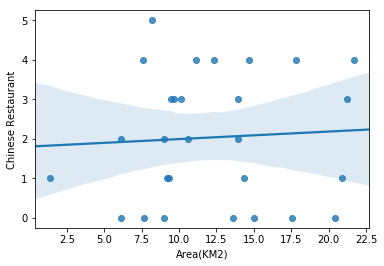

In [42]:
sns.regplot(df_final['Area(KM2)'],df_final['Chinese Restaurant'])

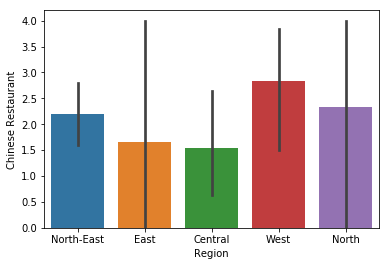

In [33]:
sns.barplot(df_final['Region'],df_final['Chinese Restaurant'])

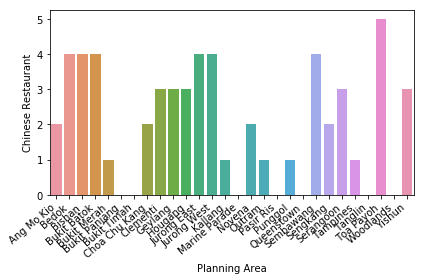

In [34]:
ax=sns.barplot(df_final['Planning Area'],df_final['Chinese Restaurant'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

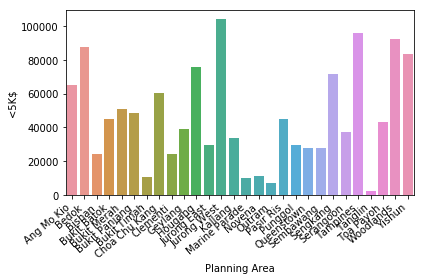

In [35]:
ax=sns.barplot(df_final['Planning Area'],df_final['<5K$'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

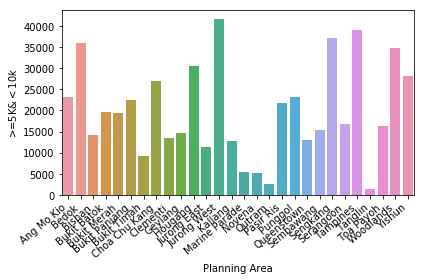

In [36]:
df_final.columns
ax=sns.barplot(df_final['Planning Area'],df_final['>=5K$&<10k$'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

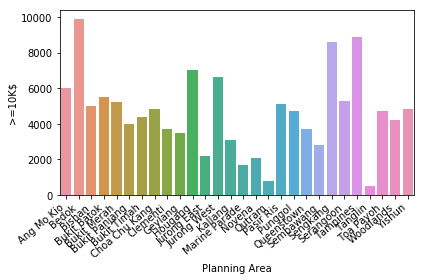

In [37]:
df_final.columns
ax=sns.barplot(df_final['Planning Area'],df_final['>=10K$'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Prepare for clustering

In [47]:
df_clust =df_final.drop(['Region',
               'Area(KM2)',
               'Population',
               'Density(/KM2)',
               'Chinese Population',
               'Latitude',
               'Longitude',
               'Planning Area','Below $1,000',
       '$1,000 - $1,499', '$1,500 - $1,999', '$2,000 - $2,499',
       '$2,500 - $2,999', '$3,000 - $3,999', '$4,000 - $4,999',
       '$5,000 - $5,999', '$6,000 - $6,999', '$7,000 - $7,999',
       '$8,000 - $8,999', '$9,000 - $9,999', '$10,000 - $10,999',
       '$11,000 - $11,999', '$12,000 & Over','Chinese Restaurant','Total Restaurants'],axis=1)

df_clust.head()

,Chinese pop density,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio
0,10279.053085,65200,23200,6000,0.285714
1,9630.244352,87800,35900,9900,0.266667
2,10133.858268,24400,14200,5000,0.333333
3,9171.608266,44700,19600,5500,0.400000
4,8550.209205,50900,19500,5200,1.000000


In [48]:
df_clust.isnull().sum()

Chinese pop density    1
<5K$                   0
>=5K$&<10k$            0
>=10K$                 0
Chinese Rest Ratio     0
dtype: int64

In [49]:
df_clust['Chinese pop density']=df_clust['Chinese pop density'].fillna(df_clust['Chinese pop density'].mean())

# Cluster on Planning Areas

In [131]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

len(kmeans.labels_)

28

In [132]:
kmeans.labels_

array([0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 0, 0])

In [133]:
#df_final.insert(0,'Cluster Labels',kmeans.labels_)
df_final['Cluster Labels'] = kmeans.labels_
df_final

,Planning Area,Region,Area(KM2),Population,Density(/KM2),Latitude,Longitude,"Below $1,000","$1,000 - $1,499","$1,500 - $1,999",...,"$12,000 & Over",Chinese Population,Chinese Restaurant,Total Restaurants,Chinese pop density,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Cluster Labels
0,Ang Mo Kio,North-East,13.94,"163,950","13,400",1.370073,103.849516,9700,12100,7900,...,8600,143290.0,2.0,7.0,10279.053085,65200,23200,6000,0.285714,0
1,Bedok,East,21.69,"279,380","13,000",1.323976,103.930216,12200,13600,12100,...,19400,208880.0,4.0,15.0,9630.244352,87800,35900,9900,0.266667,0
2,Bishan,Central,7.62,"88,010","12,000",1.350986,103.848255,3900,3700,2200,...,7600,77220.0,4.0,12.0,10133.858268,24400,14200,5000,0.333333,1
3,Bukit Batok,West,11.13,"153,740","14,000",1.349057,103.749591,6100,6500,5200,...,7400,102080.0,4.0,10.0,9171.608266,44700,19600,5500,0.400000,1
4,Bukit Merah,Central,14.34,"151,980","11,000",4.559288,101.025582,8500,9200,6900,...,8000,122610.0,1.0,1.0,8550.209205,50900,19500,5200,1.000000,1
5,Bukit Panjang,West,8.99,"139,280","15,000",1.378629,103.762136,5100,6500,5200,...,6100,103280.0,0.0,10.0,11488.320356,48400,22500,4000,0.000000,1
6,Bukit Timah,Central,17.53,"77,430","4,400",1.354690,103.776372,2100,1400,1200,...,13700,64150.0,0.0,7.0,3659.440958,10700,9200,4400,0.000000,2
7,Choa Chu Kang,West,6.11,"190,890","30,000",1.384749,103.744534,7300,7800,6300,...,6500,123450.0,2.0,10.0,20204.582651,60500,26900,4800,0.200000,0
8,Clementi,West,9.49,"92,420","9,800",1.315100,103.765231,3800,3600,2400,...,6100,70700.0,3.0,9.0,7449.947313,24000,13400,3700,0.333333,1
9,Geylang,Central,9.64,"110,200","11,400",1.318186,103.887056,6500,5900,4400,...,4900,88060.0,3.0,13.0,9134.854772,39100,14700,3500,0.230769,1


In [134]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[1.3521,103.8198], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,cpd,cr in zip(df_final['Latitude'], df_final['Longitude'], df_final['Planning Area'], df_final['Cluster Labels'],df_final['Chinese pop density'],df_final['Chinese Restaurant']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

## Cluster 1

In [135]:
df_final[df_final['Cluster Labels']==0].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
0,Ang Mo Kio,0,65200,23200,6000,0.285714,10279.053085,2.0,7.0
1,Bedok,0,87800,35900,9900,0.266667,9630.244352,4.0,15.0
7,Choa Chu Kang,0,60500,26900,4800,0.200000,20204.582651,2.0,10.0
10,Hougang,0,76000,30400,7000,0.272727,13043.790380,3.0,11.0
12,Jurong West,0,104300,41700,6600,0.400000,12950.306331,4.0,10.0
21,Sengkang,0,71600,37200,8600,0.333333,15164.305949,2.0,6.0
23,Tampines,0,95700,39000,8900,0.142857,8399.712781,1.0,7.0
26,Woodlands,0,92200,34700,4200,0.000000,11315.673289,0.0,9.0
27,Yishun,0,83200,28100,4800,0.176471,6699.623352,3.0,17.0


In [136]:
temp=df_final[df_final['Cluster Labels']==0].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


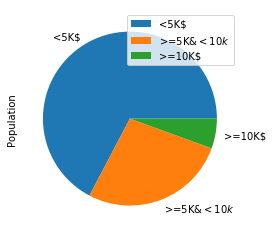

In [137]:
inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')

In [138]:
temp=df_final[df_final['Cluster Labels']==0].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

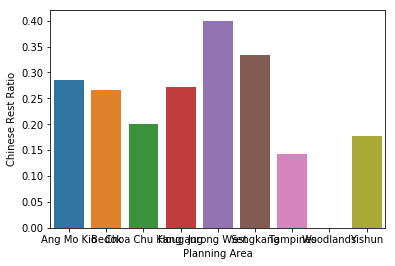

In [139]:
sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])

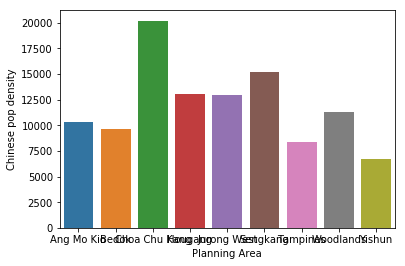

In [140]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])

## Cluster 2

In [141]:
df_final[df_final['Cluster Labels']==1].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
2,Bishan,1,24400,14200,5000,0.333333,10133.858268,4.0,12.0
3,Bukit Batok,1,44700,19600,5500,0.400000,9171.608266,4.0,10.0
4,Bukit Merah,1,50900,19500,5200,1.000000,8550.209205,1.0,1.0
5,Bukit Panjang,1,48400,22500,4000,0.000000,11488.320356,0.0,10.0
8,Clementi,1,24000,13400,3700,0.333333,7449.947313,3.0,9.0
9,Geylang,1,39100,14700,3500,0.230769,9134.854772,3.0,13.0
11,Jurong East,1,29700,11300,2200,0.333333,3372.406057,4.0,12.0
13,Kallang,1,33800,12700,3100,0.142857,8266.085060,1.0,7.0
17,Pasir Ris,1,44700,21700,5100,0.000000,6252.330226,0.0,5.0
18,Punggol,1,29400,23100,4700,0.111111,9088.865096,1.0,9.0


In [142]:
temp=df_final[df_final['Cluster Labels']==1].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


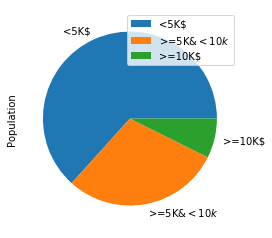

In [143]:
inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')

In [144]:
temp=df_final[df_final['Cluster Labels']==1].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

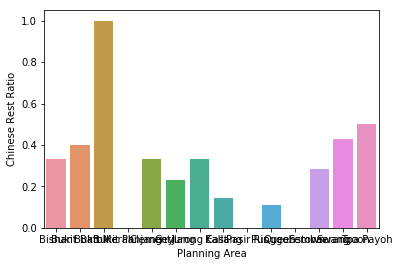

In [145]:
sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])

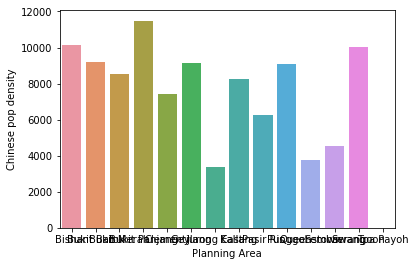

In [146]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])

## Cluster 3

In [147]:
df_final[df_final['Cluster Labels']==2].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
6,Bukit Timah,2,10700,9200,4400,0.000000,3659.440958,0.0,7.0
14,Marine Parade,2,10200,5400,1700,0.000000,5983.660131,0.0,3.0
15,Novena,2,11100,5200,2100,0.222222,4325.167038,2.0,9.0
16,Outram,2,7100,2600,800,0.090909,13153.284672,1.0,11.0
24,Tanglin,2,2300,1500,500,0.000000,1855.832241,0.0,14.0


In [148]:
temp=df_final[df_final['Cluster Labels']==2].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


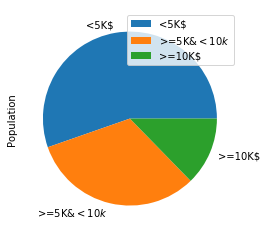

In [149]:
inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')


In [150]:
temp=df_final[df_final['Cluster Labels']==2].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

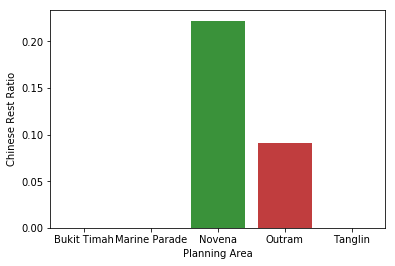

In [151]:
sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])

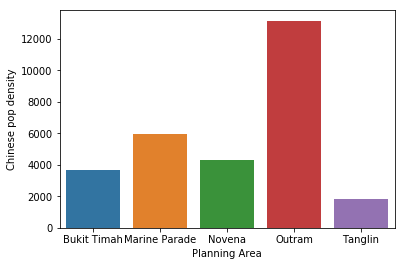

In [152]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])

## Cluster 4

In [57]:
df_final[df_final['Cluster Labels']==3].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
2,Bishan,3,24400,14200,5000,0.333333,10133.858268,4.0,12.0
8,Clementi,3,24000,13400,3700,0.333333,7449.947313,3.0,9.0
11,Jurong East,3,29700,11300,2200,0.333333,3372.406057,4.0,12.0
13,Kallang,3,33800,12700,3100,0.142857,8266.085060,1.0,7.0
18,Punggol,3,29400,23100,4700,0.111111,9088.865096,1.0,9.0
19,Queenstown,3,27700,12900,3700,0.000000,3788.056779,0.0,5.0
20,Sembawang,3,27500,15300,2800,0.285714,4512.965964,4.0,14.0


In [109]:
temp=df_final[df_final['Cluster Labels']==3].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


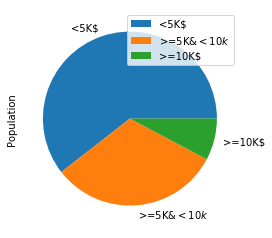

In [110]:
inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')


In [111]:
temp=df_final[df_final['Cluster Labels']==3].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

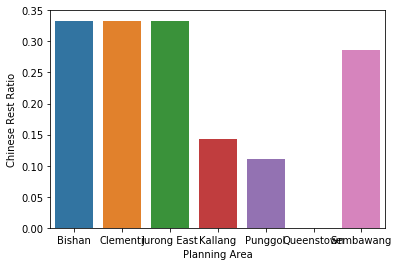

In [112]:
sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])


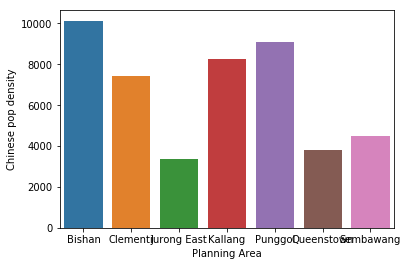

In [113]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])

## Cluster 5

In [58]:
df_final[df_final['Cluster Labels']==4].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
12,Jurong West,4,104300,41700,6600,0.400000,12950.306331,4.0,10.0
23,Tampines,4,95700,39000,8900,0.142857,8399.712781,1.0,7.0


In [115]:
temp=df_final[df_final['Cluster Labels']==4].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]


C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


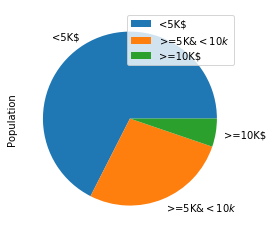

In [116]:

inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')

In [117]:
temp=df_final[df_final['Cluster Labels']==4].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

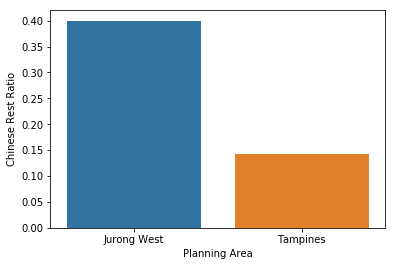

In [118]:

sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])

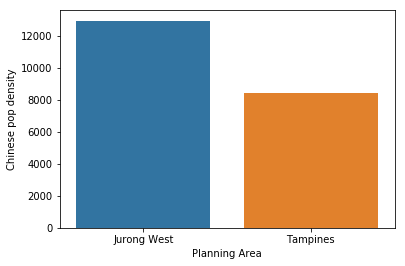

In [119]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])

## Cluster 6

In [59]:
df_final[df_final['Cluster Labels']==5].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
10,Hougang,5,76000,30400,7000,0.272727,13043.790380,3.0,11.0
21,Sengkang,5,71600,37200,8600,0.333333,15164.305949,2.0,6.0


In [120]:
temp=df_final[df_final['Cluster Labels']==5].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]


C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


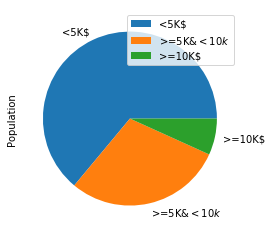

In [121]:
inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')

In [122]:
temp=df_final[df_final['Cluster Labels']==5].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

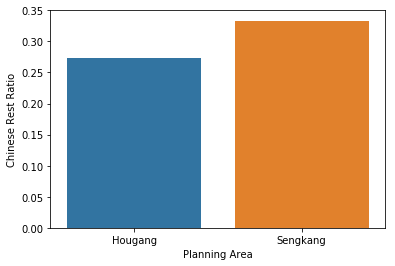

In [123]:
sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])

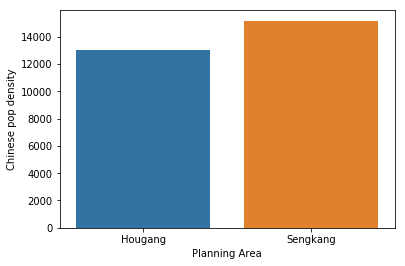

In [124]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])

## Cluster 7

In [60]:
df_final[df_final['Cluster Labels']==6].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

,Planning Area,Cluster Labels,<5K$,>=5K$&<10k$,>=10K$,Chinese Rest Ratio,Chinese pop density,Chinese Restaurant,Total Restaurants
0,Ang Mo Kio,6,65200,23200,6000,0.285714,10279.053085,2.0,7.0
7,Choa Chu Kang,6,60500,26900,4800,0.200000,20204.582651,2.0,10.0


In [126]:
temp=df_final[df_final['Cluster Labels']==6].loc[:,['Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

C:\Users\i320030\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


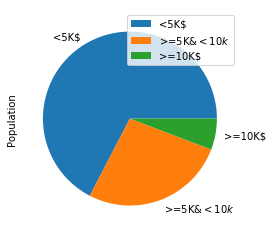

In [127]:
inc_dist=temp.groupby('Cluster Labels')['<5K$', '>=5K$&<10k$','>=10K$'].sum()
inc_dist=inc_dist.transpose()
inc_dist.columns=['Population']
inc_dist.plot.pie(y='Population')

In [128]:
temp=df_final[df_final['Cluster Labels']==6].loc[:,['Planning Area','Cluster Labels',
                                               '<5K$', '>=5K$&<10k$','>=10K$','Chinese Rest Ratio','Chinese pop density',
                                               'Chinese Restaurant','Total Restaurants']]

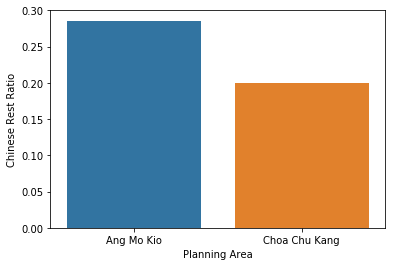

In [129]:
sns.barplot(temp['Planning Area'],temp['Chinese Rest Ratio'])


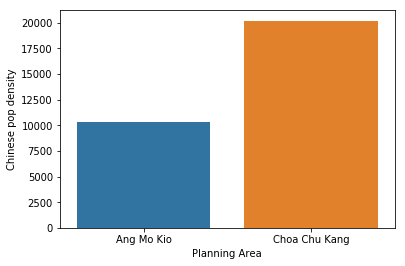

In [130]:
sns.barplot(temp['Planning Area'],temp['Chinese pop density'])